In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_data = pd.read_csv(city_data_to_load)
Ride_data = pd.read_csv(ride_data_to_load)

In [2]:
combine_city_ride = pd.merge(City_data, Ride_data, on=["city","city"], how="left")
combine_city_ride = combine_city_ride[["city","date","fare","ride_id","driver_count","type"]]
# Display the data table for preview
combine_city_ride.head(10)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban
5,Richardfort,2018-04-21 03:44:04,9.54,3698147103219,38,Urban
6,Richardfort,2018-02-03 00:14:26,29.04,4982665519010,38,Urban
7,Richardfort,2018-02-08 15:50:12,16.55,2270463070874,38,Urban
8,Richardfort,2018-04-03 15:07:34,40.77,9496210735824,38,Urban
9,Richardfort,2018-02-19 14:09:20,27.11,8690324801449,38,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
def Cal_fare_ride_drivers(Type_data):
    read_data = combine_city_ride.loc[combine_city_ride['type'] == Type_data].groupby(
        'city')
    AveFare = read_data['fare'].mean()
    Number_rides = read_data['ride_id'].count()
       Number_drivers = read_data['driver_count'].first()
    return AveFare, Number_rides, Number_drivers

In [4]:
Urban_average_fare = Cal_fare_ride_drivers('Urban')[0]
Suburban_average_fare = Cal_fare_ride_drivers('Suburban')[0]
Rural_average_fare = Cal_fare_ride_drivers('Rural')[0]
Urban_number_rides = Cal_fare_ride_drivers('Urban')[1]
Suburban_number_rides = Cal_fare_ride_drivers('Suburban')[1]
Rural_number_rides = Cal_fare_ride_drivers('Rural')[1]
Urban_number_drivers = Cal_fare_ride_drivers('Urban')[2]
Suburban_number_drivers = Cal_fare_ride_drivers('Suburban')[2]
Rural_number_drivers = Cal_fare_ride_drivers('Rural')[2]

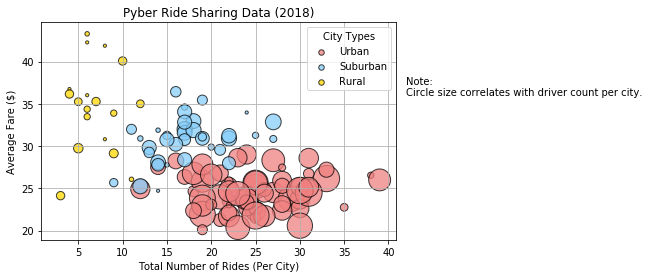

In [6]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)
ax.scatter(Urban_number_rides, Urban_average_fare, s=Urban_number_drivers*10,
           color='lightcoral', alpha=0.75, edgecolor='k', linewidth=1, label='Urban')
ax.scatter(Suburban_number_rides, Suburban_average_fare, s=Suburban_number_drivers*10,
           color='lightskyblue', alpha=0.75, edgecolor='k', linewidth=1, label='Suburban')
ax.scatter(Rural_number_rides, Rural_average_fare, s=Rural_number_drivers*10,
           color='gold', alpha=0.75, edgecolor='k', linewidth=1, label='Rural')
ax.title.set_text('Pyber Ride Sharing Data (2018)')
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid()
lgnd = plt.legend(loc="upper right", numpoints=1,
                  fontsize=10, frameon=True, title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
Note = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 36, Note, fontsize=10)
plt.show()
fig.savefig("Images/Pyber_ride_bubble_plot.png")

## Total Fares by City Type

In [7]:
def Build_pie_chart(City_index, City_values):
    labels = City_index
    sizes = City_values
    colors = ["gold", "lightskyblue", "lightcoral"]
    explode = (0, 0, 0.1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)

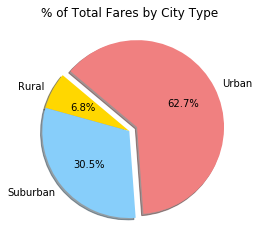

In [8]:
City_type_gb = combine_city_ride.groupby('type')
Fare_city_type = City_type_gb['fare'].sum()
Build_pie_chart(Fare_city_type.index, Fare_city_type.values)
plt.title("% of Total Fares by City Type")
plt.savefig("Images/Totalfare_citytype_piechart.png")
plt.show()

## Total Rides by City Type

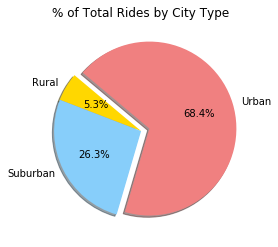

In [9]:
# Calculate Ride Percents
Ride_city_type = City_type_gb['ride_id'].count()
Build_pie_chart(Ride_city_type.index, Ride_city_type.values)
plt.title("% of Total Rides by City Type")
plt.savefig("Images/Totalrides_citytype_piechart.png")
plt.show()

## Total Drivers by City Type

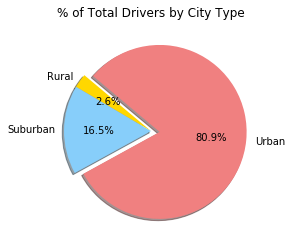

In [11]:
# Calculate Driver Percents

City_and_type_gb = City_type_gb.count()

Rural_drivers = Rural_number_drivers.sum()
Suburban_drivers = Suburban_number_drivers.sum()
Urban_drivers = Urban_number_drivers.sum()

Driver_city_type = [Rural_drivers, Suburban_drivers, Urban_drivers]

Build_pie_chart(City_and_type_gb.index, Driver_city_type)

plt.title("% of Total Drivers by City Type")
plt.savefig("Images/Totaldrivers_citytype_piechart.png")
plt.show()